# <font color='#eb3483'> COMPAS Analysis </font>


Our group analyzed the COMPAS Dataset to understand criminal recidivism more clearly.

We hypothesized that a machine learning analysis of the COMPAS Two-Year Excel Spreadsheets would describe a higher likelihood of African-American surveyors 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import missingno as msno

#This is so that you don't see a bunch of code 'warnings' (things that you could change but don't have to right now)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

#This makes all of our graphs show up in our notebook when they're made
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

sns.set(rc={'figure.figsize':(6,5)}) 
%matplotlib inline

## <font color='#eb3483'> Introduction </font>

The data, released by ProPublica, is based off of surveys filled by defendants when booked in jail, which is used by COMPAS to predict the likelihood of recidivism within the two years after release.

### <font color='#eb3483'> Understanding the Initial Dataset </font>

In [3]:
df = pd.read_csv('compas-analysis-master/compas-scores-two-years.csv')

In [4]:
df

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


In [5]:
df.columns

Index(['age', 'juv_fel_count', 'decile_score', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'days_b_screening_arrest',
       'is_recid', 'is_violent_recid', 'decile_score.1', 'v_decile_score',
       'priors_count.1', 'start', 'end', 'event', 'two_year_recid',
       'sex_Female', 'sex_Male', 'race_African-American', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Native American', 'race_Other',
       'c_charge_degree_F', 'c_charge_degree_M', 'r_charge_degree_(CO3)',
       'r_charge_degree_(F1)', 'r_charge_degree_(F2)', 'r_charge_degree_(F3)',
       'r_charge_degree_(F5)', 'r_charge_degree_(F6)', 'r_charge_degree_(F7)',
       'r_charge_degree_(M1)', 'r_charge_degree_(M2)', 'r_charge_degree_(MO3)',
       'vr_charge_degree_(F1)', 'vr_charge_degree_(F2)',
       'vr_charge_degree_(F3)', 'vr_charge_degree_(F5)',
       'vr_charge_degree_(F6)', 'vr_charge_degree_(F7)',
       'vr_charge_degree_(M1)', 'vr_charge_degree_(M2)',
       'vr_charge_degree_(MO3)'

In [6]:
df.dtypes

age                          int64
juv_fel_count                int64
decile_score                 int64
juv_misd_count               int64
juv_other_count              int64
priors_count                 int64
days_b_screening_arrest    float64
is_recid                     int64
is_violent_recid             int64
decile_score.1               int64
v_decile_score               int64
priors_count.1               int64
start                        int64
end                          int64
event                        int64
two_year_recid               int64
sex_Female                   int64
sex_Male                     int64
race_African-American        int64
race_Asian                   int64
race_Caucasian               int64
race_Hispanic                int64
race_Native American         int64
race_Other                   int64
c_charge_degree_F            int64
c_charge_degree_M            int64
r_charge_degree_(CO3)        int64
r_charge_degree_(F1)         int64
r_charge_degree_(F2)

### <font color='#eb3483'> Removing rows based on context </font>
Similar to ProPublica, we assume that is a COMPAS scored crime was not within 30 days from when the person was arrested, the offense recorded is not necessarily what was used in the prediction. Therefore, we won't be using such cases. Additionally, people charged with traffic offences (c_charge_degree of "O") will not be considered.

In [7]:
df = df[
    (df.days_b_screening_arrest <= 30) &
    (df.days_b_screening_arrest >= -30) &
    (df.c_charge_degree != 'O')
]

### <font color='#eb3483'> Removing duplicate rows </font>
Fortunately, no duplicate rows were found.

In [8]:
print(df.shape)

# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]

print(duplicate_rows_df.shape)

(6172, 53)
(0, 53)


### <font color='#eb3483'> Removing columns with too much missing data </font>
Columns that had missing fields of data, such that removing the row rather than the column would lead to a greater loss in usable data, were removed. Fortunately, most of these columns are mostly irrelevant to our predictions, e.g., case numbers

In [9]:
df.isna().sum()

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest       0
c_jail_in                     0
c_jail_out                    0
c_case_number                 0
c_offense_date              784
c_arrest_date              5388
c_days_from_compas            0
c_charge_degree               0
c_charge_desc                 5
is_recid                      0
r_case_number              3182
r_charge_degree            3182
r_days_from_arrest         4175
r_offense_date             3182
r_charge_desc              3228
r_jail_in                  4175
r_jail_o

In [10]:
drop_columns_na = [
    "c_offense_date",
    "c_arrest_date",
    "r_case_number",
    "r_charge_degree",
    "r_days_from_arrest",
    "r_offense_date",
    "r_charge_desc",
    "r_jail_in",
    "r_jail_out",
    "violent_recid",
    "vr_case_number",
    "vr_charge_degree",
    "vr_offense_date",
    "vr_charge_desc"]
df = df.drop(columns=drop_columns_na)

### <font color='#eb3483'> Removing irrelevant columns </font>
E.g., names, ids, dob (since age is also given) if they aren't removed by the previous step

In [11]:
drop_columns_irrel = [
    "id",
    "name",
    "first",
    "last",
    "compas_screening_date",
    "dob",
    "age_cat",
    "days_b_screening_arrest",
    "c_jail_in",
    "c_jail_out",
    "c_case_number",
    "c_days_from_compas",
    "c_charge_desc",
    "type_of_assessment",
    "screening_date",
    "v_type_of_assessment",
    "v_decile_score",
    "v_score_text",
    "v_screening_date",
    "in_custody",
    "out_custody",
    "score_text",
    "start",
    "end",
    "event",
    "decile_score.1",
    "priors_count.1"
]
df = df.drop(columns=drop_columns_irrel)

## <font color='#eb3483'> Understanding The Top Offenders </font>

In [11]:
top_reoffenders = df.sort_values(by ='priors_count', ascending=False).head()
top_reoffenders

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,is_recid,is_violent_recid,decile_score.1,...,r_charge_degree_(MO3),vr_charge_degree_(F1),vr_charge_degree_(F2),vr_charge_degree_(F3),vr_charge_degree_(F5),vr_charge_degree_(F6),vr_charge_degree_(F7),vr_charge_degree_(M1),vr_charge_degree_(M2),vr_charge_degree_(MO3)
6825,45,0,8,0,0,38,-1.0,1,1,8,...,0,0,0,1,0,0,0,0,0,0
2058,58,0,7,0,0,38,-112.0,1,0,7,...,0,0,0,0,0,0,0,0,0,0
2186,38,0,7,5,0,37,-1.0,1,1,7,...,0,0,0,1,0,0,0,0,0,0
328,53,0,6,0,0,36,-7.0,1,0,6,...,0,0,0,0,0,0,0,0,0,0
4374,39,0,10,0,0,35,-45.0,0,0,10,...,0,0,0,0,0,0,0,0,0,0


In [12]:
def find_min_max_in(col):
    top = df[col].idxmax()
    top_df = pd.DataFrame(df.loc[top])
    
    bottom = df[col].idxmin()
    bottom_df = pd.DataFrame(df.loc[bottom])
    
    info_df = pd.concat([top_df, bottom_df], axis=1)
    return info_df

find_min_max_in('priors_count')

,2058,0
age,58.0,69.0
juv_fel_count,0.0,0.0
decile_score,7.0,1.0
juv_misd_count,0.0,0.0
juv_other_count,0.0,0.0
priors_count,38.0,0.0
days_b_screening_arrest,-112.0,-1.0
is_recid,1.0,0.0
is_violent_recid,0.0,0.0
decile_score.1,7.0,1.0


## <font color='#eb3483'> Summary Statistics </font>

In [14]:
df.describe()

,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,is_recid,is_violent_recid,two_year_recid
count,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000
mean,34.534511,0.059300,4.418503,0.091218,0.110661,3.246436,0.484446,0.112119,0.455120
std,11.730938,0.463599,2.839463,0.497872,0.470731,4.743770,0.499799,0.315539,0.498022
min,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,42.000000,0.000000,7.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000
max,96.000000,20.000000,10.000000,13.000000,9.000000,38.000000,1.000000,1.000000,1.000000


### <font color='#eb3483'> Distribution of COMPAS scores for different races </font>

In [16]:
race_frequency = df.groupby(df.race).size()
print(race_frequency)

race
African-American    3175
Asian                 31
Caucasian           2103
Hispanic             509
Native American       11
Other                343
dtype: int64


In [17]:
compas_pred_hist = df[["race", "decile_score", "two_year_recid"]]
compas_pred_hist["compas_acc"] = compas_pred_hist["decile_score"] - compas_pred_hist["two_year_recid"]

**African-Americans vs Caucasians**

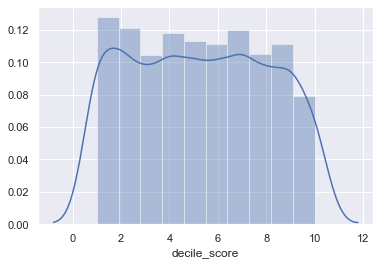

In [18]:
sns.distplot(compas_pred_hist[compas_pred_hist.race=="African-American"].decile_score, bins=10)

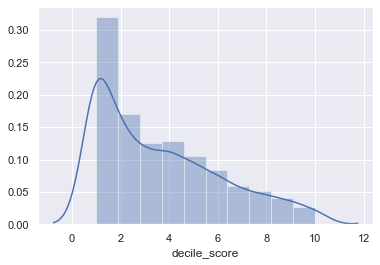

In [19]:
sns.distplot(compas_pred_hist[compas_pred_hist.race=="Caucasian"].decile_score, bins=10)

## <font color='#eb3483'> Examaining Bias in COMPAS Predictions </font>

### <font color='#eb3483'> One-Hot Encoding of Data </font>

In [20]:
to_code = ["sex", "race", "c_charge_degree"]
df = pd.merge(df, pd.get_dummies(data=df[to_code], columns=to_code), left_index=True, right_index=True)

### <font color='#eb3483'> Linear Regression against COMPAS scores </font>

In [42]:
compas_pred = "decile_score"
target = "two_year_recid"
independent_variables = df.drop(columns=[compas_pred, target]).select_dtypes(exclude=['object']).columns

In [43]:
lin_reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(
     df[independent_variables],   # X
     df[compas_pred], # y
     test_size=0.2,   # % of the data that goes to the test dataset
     random_state=13   # ensure reproductibility
)
# train the model
lin_reg.fit(X=X_train, y=y_train)

# make predictions
predictions = lin_reg.predict(X_test)
print(predictions)

[6.4279888  4.89655708 2.29527712 ... 4.68214069 1.79047908 6.73618951]


**Correlation between race and higher COMPAS score**

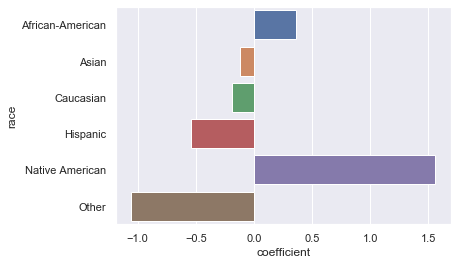

In [51]:
races = [race[5:] for race in independent_variables[9:15]]
race_data = pd.DataFrame(data={"race": races, "coefficient": lin_reg.coef_[9:15]})
sns.barplot(x=race_data.coefficient, y=race_data.race)

In [56]:
race_frequency

race
African-American    3175
Asian                 31
Caucasian           2103
Hispanic             509
Native American       11
Other                343
dtype: int64

**Correlation between sex and higher COMPAS score**

In [54]:
independent_variables

Index(['sex_Female', 'sex_Male'], dtype='object')

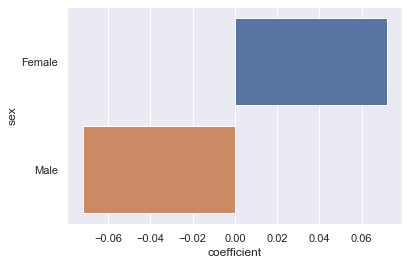

In [55]:
sexes = [sex[4:] for sex in independent_variables[7:9]]
sex_data = pd.DataFrame(data={"sex": sexes, "coefficient": lin_reg.coef_[7:9]})
sns.barplot(x=sex_data.coefficient, y=sex_data.sex)

## <font color='#eb3483'> Logistical Regression </font>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
#sns.pairplot(df)

In [ ]:
from ipywidgets import interact, fixed

#Create our plotting function
def plotRecidivismPercent(df, col):
    #Check out what average recidivism is for each potential value in a collumn
    df.groupby(col).agg({'Two_yr_Recidivism':np.mean}).plot.barh()

#Let's look at all columns (you might want to drop numeric columns 
#that aren't binary but you can also just ignore that graph)
columns_to_plot = df.drop('Two_yr_Recidivism',axis=1).columns
interact(plotRecidivismPercent, 
         col=columns_to_plot, df1=fixed(df));

In [ ]:
#Get our data into the right format
X = df.drop('Two_yr_Recidivism', axis=1)
Y = df['Two_yr_Recidivism']
X_tr, X_test, Y_tr, Y_test = train_test_split(X,Y, test_size = 0.2)

In [ ]:
Y_tr

In [ ]:
#Instantiate our logistic regression model
logreg = LogisticRegression()

#Fit our training data
logreg.fit(X_tr, Y_tr)

#Predict on our test data
predictions = logreg.predict(X_test)

predictions[:10]

In [ ]:
#Check accuracy
print("Accuracy: ", (predictions == Y_test).mean())

In [ ]:
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression()
cross_val_score(logreg, X, Y, scoring="accuracy", 
                cv=10).mean()

In [ ]:
logreg = LogisticRegression()
cross_val_score(logreg, X, Y, scoring="roc_auc", 
                cv=10).mean()

In [ ]:
logreg = LogisticRegression()

#Fit our training data
logreg.fit(X_tr, Y_tr)

#Predict on our test data
for col in ['African_American', 'Asian', 'Hispanic', 'Native_American', 'Other']:
    predictions = logreg.predict(X_test[X_test[col] == 1])
    print("Accuracy (%s): "%col, (predictions == Y_test[X_test[col] == 1]).mean())